# Data Integration

#### Importing Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Importing Input Data Files

In [2]:
data = pd.read_csv('Data Files/scraped_df_with_demographics.csv')
pd.set_option('display.max_columns', None)

In [3]:
data.shape[1]

563

In [4]:
data.head()

,Latitude,Longitude,Visits,Grocery_Stores_1mile,Food_Outlets_1mile,Educational_Institutions_1mile,Residential_Housing_1mile,Commercial_Housing_1mile,Fuel_Stations_Car_Wash_1mile,Hospitals_3miles,Apparels_3miles,Tourist_Destinations_5miles,Hotels_5miles,Airports_5miles,Nearest Motorway Entrance Lat,Nearest Motorway Entrance Lon,Driving Distance to Nearest Motorway,Duration to Nearest Motorway,Traffic (AADT),Latitude.1,Longitude.1,Accuracy Score,Accuracy Type,Number,Street,Unit Type,Unit Number,City,State,County,Zip,Country,Source,Census Year,State FIPS,County FIPS,Place Name,Place FIPS,Census Tract Code,Census Block Code,Census Block Group,Full FIPS (block),Full FIPS (tract),Metro/Micro Statistical Area Name,Metro/Micro Statistical Area Code,Metro/Micro Statistical Area Type,Combined Statistical Area Name,Combined Statistical Area Code,Metropolitan Division Area Name,Metropolitan Division Area Code,ACS Demographics/Median age/Total/Value,ACS Demographics/Median age/Total/Margin of error,ACS Demographics/Median age/Male/Value,ACS Demographics/Median age/Male/Margin of error,ACS Demographics/Median age/Female/Value,ACS Demographics/Median age/Female/Margin of error,ACS Demographics/Population by age range/Total/Value,ACS Demographics/Population by age range/Total/Margin of error,ACS Demographics/Population by age range/Male/Value,ACS Demographics/Population by age range/Male/Margin of error,ACS Demographics/Population by age range/Male/Percentage,ACS Demographics/Population by age range/Male: Under 5 years/Value,ACS Demographics/Population by age range/Male: Under 5 years/Margin of error,ACS Demographics/Population by age range/Male: Under 5 years/Percentage,ACS Demographics/Population by age range/Male: 5 to 9 years/Value,ACS Demographics/Population by age range/Male: 5 to 9 years/Margin of error,ACS Demographics/Population by age range/Male: 5 to 9 years/Percentage,ACS Demographics/Population by age range/Male: 10 to 14 years/Value,ACS Demographics/Population by age range/Male: 10 to 14 years/Margin of error,ACS Demographics/Population by age range/Male: 10 to 14 years/Percentage,ACS Demographics/Population by age range/Male: 15 to 17 years/Value,ACS Demographics/Population by age range/Male: 15 to 17 years/Margin of error,ACS Demographics/Population by age range/Male: 15 to 17 years/Percentage,ACS Demographics/Population by age range/Male: 18 and 19 years/Value,ACS Demographics/Population by age range/Male: 18 and 19 years/Margin of error,ACS Demographics/Population by age range/Male: 18 and 19 years/Percentage,ACS Demographics/Population by age range/Male: 20 years/Value,ACS Demographics/Population by age range/Male: 20 years/Margin of error,ACS Demographics/Population by age range/Male: 20 years/Percentage,ACS Demographics/Population by age range/Male: 21 years/Value,ACS Demographics/Population by age range/Male: 21 years/Margin of error,ACS Demographics/Population by age range/Male: 21 years/Percentage,ACS Demographics/Population by age range/Male: 22 to 24 years/Value,ACS Demographics/Population by age range/Male: 22 to 24 years/Margin of error,ACS Demographics/Population by age range/Male: 22 to 24 years/Percentage,ACS Demographics/Population by age range/Male: 25 to 29 years/Value,ACS Demographics/Population by age range/Male: 25 to 29 years/Margin of error,ACS Demographics/Population by age range/Male: 25 to 29 years/Percentage,ACS Demographics/Population by age range/Male: 30 to 34 years/Value,ACS Demographics/Population by age range/Male: 30 to 34 years/Margin of error,ACS Demographics/Population by age range/Male: 30 to 34 years/Percentage,ACS Demographics/Population by age range/Male: 35 to 39 years/Value,ACS Demographics/Population by age range/Male: 35 to 39 years/Margin of error,ACS Demographics/Population by age range/Male: 35 to 39 years/Percentage,ACS Demographics/Population by age range/Male: 40 to 44 years/Value,ACS Demographics/Population by age range/Male: 40 to 44 years/Margin of error,ACS Demographics/Po

#### Filtering to keep only Relevant Input Features

In [5]:
# Define the columns to keep
columns_to_keep = [
    "Latitude", "Longitude", "Visits", "Grocery_Stores_1mile", 
    "Food_Outlets_1mile", "Educational_Institutions_1mile", 
    "Residential_Housing_1mile", "Commercial_Housing_1mile", 
    "Fuel_Stations_Car_Wash_1mile", "Hospitals_3miles", 
    "Apparels_3miles", "Tourist_Destinations_5miles", 
    "Hotels_5miles", "Airports_5miles", 
    "Driving Distance to Nearest Motorway", "Duration to Nearest Motorway", 
    "Traffic (AADT)", "Census Block Code","City", "State", "County", 
    "ACS Demographics/Median age/Total/Value",
    "ACS Demographics/Population by age range/Total/Value",
    "ACS Demographics/Population by age range/Male: Under 5 years/Value", 
    "ACS Demographics/Population by age range/Male: 5 to 9 years/Value", 
    "ACS Demographics/Population by age range/Male: 10 to 14 years/Value", 
    "ACS Demographics/Population by age range/Male: 15 to 17 years/Value", 
    "ACS Demographics/Population by age range/Male: 18 and 19 years/Value", 
    "ACS Demographics/Population by age range/Male: 20 years/Value", 
    "ACS Demographics/Population by age range/Male: 21 years/Value", 
    "ACS Demographics/Population by age range/Male: 22 to 24 years/Value", 
    "ACS Demographics/Population by age range/Male: 25 to 29 years/Value", 
    "ACS Demographics/Population by age range/Male: 30 to 34 years/Value", 
    "ACS Demographics/Population by age range/Male: 35 to 39 years/Value", 
    "ACS Demographics/Population by age range/Male: 40 to 44 years/Value", 
    "ACS Demographics/Population by age range/Male: 45 to 49 years/Value", 
    "ACS Demographics/Population by age range/Male: 50 to 54 years/Value", 
    "ACS Demographics/Population by age range/Male: 55 to 59 years/Value", 
    "ACS Demographics/Population by age range/Male: 60 and 61 years/Value", 
    "ACS Demographics/Population by age range/Male: 62 to 64 years/Value", 
    "ACS Demographics/Population by age range/Male: 65 and 66 years/Value", 
    "ACS Demographics/Population by age range/Male: 67 to 69 years/Value", 
    "ACS Demographics/Population by age range/Male: 70 to 74 years/Value", 
    "ACS Demographics/Population by age range/Male: 75 to 79 years/Value", 
    "ACS Demographics/Population by age range/Male: 80 to 84 years/Value", 
    "ACS Demographics/Population by age range/Male: 85 years and over/Value", 
    "ACS Demographics/Population by age range/Female: Under 5 years/Value", 
    "ACS Demographics/Population by age range/Female: 5 to 9 years/Value", 
    "ACS Demographics/Population by age range/Female: 10 to 14 years/Value", 
    "ACS Demographics/Population by age range/Female: 15 to 17 years/Value", 
    "ACS Demographics/Population by age range/Female: 18 and 19 years/Value", 
    "ACS Demographics/Population by age range/Female: 20 years/Value", 
    "ACS Demographics/Population by age range/Female: 21 years/Value", 
    "ACS Demographics/Population by age range/Female: 22 to 24 years/Value", 
    "ACS Demographics/Population by age range/Female: 25 to 29 years/Value", 
    "ACS Demographics/Population by age range/Female: 30 to 34 years/Value", 
    "ACS Demographics/Population by age range/Female: 35 to 39 years/Value", 
    "ACS Demographics/Population by age range/Female: 40 to 44 years/Value", 
    "ACS Demographics/Population by age range/Female: 45 to 49 years/Value", 
    "ACS Demographics/Population by age range/Female: 50 to 54 years/Value", 
    "ACS Demographics/Population by age range/Female: 55 to 59 years/Value", 
    "ACS Demographics/Population by age range/Female: 60 and 61 years/Value", 
    "ACS Demographics/Population by age range/Female: 62 to 64 years/Value", 
    "ACS Demographics/Population by age range/Female: 65 and 66 years/Value", 
    "ACS Demographics/Population by age range/Female: 67 to 69 years/Value", 
    "ACS Demographics/Population by age range/Female: 70 to 74 years/Value", 
    "ACS Demographics/Population by age range/Female: 75 to 79 years/Value", 
    "ACS Demographics/Population by age range/Female: 80 to 84 years/Value", 
    "ACS Demographics/Population by age range/Female: 85 years and over/Value", 
    "ACS Families/Household type by household/Total/Value",
    "ACS Families/Household type by household/Family households/Value", 
    "ACS Families/Household type by household/Nonfamily households/Value", 
    "ACS Economics/Median household income/Total/Value", 
    "ACS Economics/Household income/Less than $10,000/Value", 
    "ACS Economics/Household income/$10,000 to $14,999/Value", 
    "ACS Economics/Household income/$15,000 to $19,999/Value", 
    "ACS Economics/Household income/$20,000 to $24,999/Value", 
    "ACS Economics/Household income/$25,000 to $29,999/Value", 
    "ACS Economics/Household income/$30,000 to $34,999/Value", 
    "ACS Economics/Household income/$35,000 to $39,999/Value", 
    "ACS Economics/Household income/$40,000 to $44,999/Value", 
    "ACS Economics/Household income/$45,000 to $49,999/Value", 
    "ACS Economics/Household income/$50,000 to $59,999/Value", 
    "ACS Economics/Household income/$60,000 to $74,999/Value", 
    "ACS Economics/Household income/$75,000 to $99,999/Value", 
    "ACS Economics/Household income/$100,000 to $124,999/Value", 
    "ACS Economics/Household income/$125,000 to $149,999/Value", 
    "ACS Economics/Household income/$150,000 to $199,999/Value", 
    "ACS Economics/Household income/$200,000 or more/Value"
]

# Filter the dataframe to keep only the specified columns
data = data[columns_to_keep]

#### Bucketing Features

In [6]:
# Summing up for Household Income categories
data['Household_Income_Under50k'] = data[[
    "ACS Economics/Household income/Less than $10,000/Value", 
    "ACS Economics/Household income/$10,000 to $14,999/Value", 
    "ACS Economics/Household income/$15,000 to $19,999/Value", 
    "ACS Economics/Household income/$20,000 to $24,999/Value", 
    "ACS Economics/Household income/$25,000 to $29,999/Value", 
    "ACS Economics/Household income/$30,000 to $34,999/Value", 
    "ACS Economics/Household income/$35,000 to $39,999/Value", 
    "ACS Economics/Household income/$40,000 to $44,999/Value", 
    "ACS Economics/Household income/$45,000 to $49,999/Value"
]].sum(axis=1)

data['Household_Income_50to100k'] = data[[
    "ACS Economics/Household income/$50,000 to $59,999/Value", 
    "ACS Economics/Household income/$60,000 to $74,999/Value", 
    "ACS Economics/Household income/$75,000 to $99,999/Value"
]].sum(axis=1)

data['Household_Income_100to200k'] = data[[
    "ACS Economics/Household income/$100,000 to $124,999/Value", 
    "ACS Economics/Household income/$125,000 to $149,999/Value", 
    "ACS Economics/Household income/$150,000 to $199,999/Value"
]].sum(axis=1)

data['Household_Income_200k+'] = data[
    "ACS Economics/Household income/$200,000 or more/Value"
]

# Summing up for Population by age and gender categories
data['Population_Male_Under15'] = data[[
    "ACS Demographics/Population by age range/Male: Under 5 years/Value", 
    "ACS Demographics/Population by age range/Male: 5 to 9 years/Value", 
    "ACS Demographics/Population by age range/Male: 10 to 14 years/Value"
]].sum(axis=1)

data['Population_Male_15to64'] = data[[
    "ACS Demographics/Population by age range/Male: 15 to 17 years/Value", 
    "ACS Demographics/Population by age range/Male: 18 and 19 years/Value", 
    "ACS Demographics/Population by age range/Male: 20 years/Value", 
    "ACS Demographics/Population by age range/Male: 21 years/Value", 
    "ACS Demographics/Population by age range/Male: 22 to 24 years/Value", 
    "ACS Demographics/Population by age range/Male: 25 to 29 years/Value", 
    "ACS Demographics/Population by age range/Male: 30 to 34 years/Value", 
    "ACS Demographics/Population by age range/Male: 35 to 39 years/Value", 
    "ACS Demographics/Population by age range/Male: 40 to 44 years/Value", 
    "ACS Demographics/Population by age range/Male: 45 to 49 years/Value", 
    "ACS Demographics/Population by age range/Male: 50 to 54 years/Value", 
    "ACS Demographics/Population by age range/Male: 55 to 59 years/Value", 
    "ACS Demographics/Population by age range/Male: 60 and 61 years/Value", 
    "ACS Demographics/Population by age range/Male: 62 to 64 years/Value"
]].sum(axis=1)

data['Population_Male_65+'] = data[[
    "ACS Demographics/Population by age range/Male: 65 and 66 years/Value", 
    "ACS Demographics/Population by age range/Male: 67 to 69 years/Value", 
    "ACS Demographics/Population by age range/Male: 70 to 74 years/Value", 
    "ACS Demographics/Population by age range/Male: 75 to 79 years/Value", 
    "ACS Demographics/Population by age range/Male: 80 to 84 years/Value", 
    "ACS Demographics/Population by age range/Male: 85 years and over/Value"
]].sum(axis=1)

data['Population_Female_Under15'] = data[[
    "ACS Demographics/Population by age range/Female: Under 5 years/Value", 
    "ACS Demographics/Population by age range/Female: 5 to 9 years/Value", 
    "ACS Demographics/Population by age range/Female: 10 to 14 years/Value"
]].sum(axis=1)

data['Population_Female_15to64'] = data[[
    "ACS Demographics/Population by age range/Female: 15 to 17 years/Value", 
    "ACS Demographics/Population by age range/Female: 18 and 19 years/Value", 
    "ACS Demographics/Population by age range/Female: 20 years/Value", 
    "ACS Demographics/Population by age range/Female: 21 years/Value", 
    "ACS Demographics/Population by age range/Female: 22 to 24 years/Value", 
    "ACS Demographics/Population by age range/Female: 25 to 29 years/Value", 
    "ACS Demographics/Population by age range/Female: 30 to 34 years/Value", 
    "ACS Demographics/Population by age range/Female: 35 to 39 years/Value", 
    "ACS Demographics/Population by age range/Female: 40 to 44 years/Value", 
    "ACS Demographics/Population by age range/Female: 45 to 49 years/Value", 
    "ACS Demographics/Population by age range/Female: 50 to 54 years/Value", 
    "ACS Demographics/Population by age range/Female: 55 to 59 years/Value", 
    "ACS Demographics/Population by age range/Female: 60 and 61 years/Value", 
    "ACS Demographics/Population by age range/Female: 62 to 64 years/Value"
]].sum(axis=1)

data['Population_Female_65+'] = data[[
    "ACS Demographics/Population by age range/Female: 65 and 66 years/Value", 
    "ACS Demographics/Population by age range/Female: 67 to 69 years/Value", 
    "ACS Demographics/Population by age range/Female: 70 to 74 years/Value", 
    "ACS Demographics/Population by age range/Female: 75 to 79 years/Value", 
    "ACS Demographics/Population by age range/Female: 80 to 84 years/Value", 
    "ACS Demographics/Population by age range/Female: 85 years and over/Value"
]].sum(axis=1)

columns_to_remove = [
    # Household Income columns
    "ACS Economics/Household income/Less than $10,000/Value", 
    "ACS Economics/Household income/$10,000 to $14,999/Value", 
    "ACS Economics/Household income/$15,000 to $19,999/Value", 
    "ACS Economics/Household income/$20,000 to $24,999/Value", 
    "ACS Economics/Household income/$25,000 to $29,999/Value", 
    "ACS Economics/Household income/$30,000 to $34,999/Value", 
    "ACS Economics/Household income/$35,000 to $39,999/Value", 
    "ACS Economics/Household income/$40,000 to $44,999/Value", 
    "ACS Economics/Household income/$45,000 to $49,999/Value", 
    "ACS Economics/Household income/$50,000 to $59,999/Value", 
    "ACS Economics/Household income/$60,000 to $74,999/Value", 
    "ACS Economics/Household income/$75,000 to $99,999/Value", 
    "ACS Economics/Household income/$100,000 to $124,999/Value", 
    "ACS Economics/Household income/$125,000 to $149,999/Value", 
    "ACS Economics/Household income/$150,000 to $199,999/Value", 
    "ACS Economics/Household income/$200,000 or more/Value",
    # Population Age and Gender columns
    "ACS Demographics/Population by age range/Male: Under 5 years/Value", 
    "ACS Demographics/Population by age range/Male: 5 to 9 years/Value", 
    "ACS Demographics/Population by age range/Male: 10 to 14 years/Value", 
    "ACS Demographics/Population by age range/Male: 15 to 17 years/Value", 
    "ACS Demographics/Population by age range/Male: 18 and 19 years/Value", 
    "ACS Demographics/Population by age range/Male: 20 years/Value", 
    "ACS Demographics/Population by age range/Male: 21 years/Value", 
    "ACS Demographics/Population by age range/Male: 22 to 24 years/Value", 
    "ACS Demographics/Population by age range/Male: 25 to 29 years/Value", 
    "ACS Demographics/Population by age range/Male: 30 to 34 years/Value", 
    "ACS Demographics/Population by age range/Male: 35 to 39 years/Value", 
    "ACS Demographics/Population by age range/Male: 40 to 44 years/Value", 
    "ACS Demographics/Population by age range/Male: 45 to 49 years/Value", 
    "ACS Demographics/Population by age range/Male: 50 to 54 years/Value", 
    "ACS Demographics/Population by age range/Male: 55 to 59 years/Value", 
    "ACS Demographics/Population by age range/Male: 60 and 61 years/Value", 
    "ACS Demographics/Population by age range/Male: 62 to 64 years/Value", 
    "ACS Demographics/Population by age range/Male: 65 and 66 years/Value", 
    "ACS Demographics/Population by age range/Male: 67 to 69 years/Value", 
    "ACS Demographics/Population by age range/Male: 70 to 74 years/Value", 
    "ACS Demographics/Population by age range/Male: 75 to 79 years/Value", 
    "ACS Demographics/Population by age range/Male: 80 to 84 years/Value", 
    "ACS Demographics/Population by age range/Male: 85 years and over/Value", 
    "ACS Demographics/Population by age range/Female: Under 5 years/Value", 
    "ACS Demographics/Population by age range/Female: 5 to 9 years/Value", 
    "ACS Demographics/Population by age range/Female: 10 to 14 years/Value", 
    "ACS Demographics/Population by age range/Female: 15 to 17 years/Value", 
    "ACS Demographics/Population by age range/Female: 18 and 19 years/Value", 
    "ACS Demographics/Population by age range/Female: 20 years/Value", 
    "ACS Demographics/Population by age range/Female: 21 years/Value", 
    "ACS Demographics/Population by age range/Female: 22 to 24 years/Value", 
    "ACS Demographics/Population by age range/Female: 25 to 29 years/Value", 
    "ACS Demographics/Population by age range/Female: 30 to 34 years/Value", 
    "ACS Demographics/Population by age range/Female: 35 to 39 years/Value", 
    "ACS Demographics/Population by age range/Female: 40 to 44 years/Value", 
    "ACS Demographics/Population by age range/Female: 45 to 49 years/Value", 
    "ACS Demographics/Population by age range/Female: 50 to 54 years/Value", 
    "ACS Demographics/Population by age range/Female: 55 to 59 years/Value", 
    "ACS Demographics/Population by age range/Female: 60 and 61 years/Value", 
    "ACS Demographics/Population by age range/Female: 62 to 64 years/Value", 
    "ACS Demographics/Population by age range/Female: 65 and 66 years/Value", 
    "ACS Demographics/Population by age range/Female: 67 to 69 years/Value", 
    "ACS Demographics/Population by age range/Female: 70 to 74 years/Value", 
    "ACS Demographics/Population by age range/Female: 75 to 79 years/Value", 
    "ACS Demographics/Population by age range/Female: 80 to 84 years/Value", 
    "ACS Demographics/Population by age range/Female: 85 years and over/Value"
]

# Dropping the columns used for aggregation
data.drop(columns=columns_to_remove, inplace=True)

#### Renaming the Columns for Readability

In [7]:
data.rename(columns={
    "ACS Demographics/Median age/Total/Value": "Median_Age",
    "ACS Demographics/Population by age range/Total/Value": "Total_Population",
    "ACS Families/Household type by household/Total/Value": "Total_Households",
    "ACS Families/Household type by household/Family households/Value": "Family_Households",
    "ACS Families/Household type by household/Nonfamily households/Value": "Non_Family_Households",
    "ACS Economics/Median household income/Total/Value": "Median_Household_Income"
}, inplace=True)

#### Converting the Proximity Columns to Miles and Seconds

In [8]:
# Remove " mi" from 'Driving Distance to Nearest Motorway' and convert to numeric
data['Driving Distance to Nearest Motorway'] = data['Driving Distance to Nearest Motorway'].str.replace(' mi', '').astype(float)

# Rename the column
data.rename(columns={'Driving Distance to Nearest Motorway': 'Driving Distance to Nearest Motorway (in miles)'}, inplace=True)

In [9]:
def convert_duration_to_mins(duration_str):
    total_minutes = 0
    if 'hour' in duration_str:
        parts = duration_str.split()
        hours_index = parts.index('hour') - 1
        total_minutes += int(parts[hours_index]) * 60
        if 'mins' in parts:
            mins_index = parts.index('mins') - 1
            total_minutes += int(parts[mins_index])
    elif 'mins' in duration_str:
        total_minutes = int(duration_str.replace(' mins', ''))
    return total_minutes

# Apply the conversion function to 'Duration to Nearest Motorway'
data['Duration to Nearest Motorway'] = data['Duration to Nearest Motorway'].apply(convert_duration_to_mins)

# Rename the column
data.rename(columns={'Duration to Nearest Motorway': 'Duration to Nearest Motorway (in mins)'}, inplace=True)

<hr style="border:2px solid #000"/>

# Null Treatment

In [10]:
null_counts = data.isnull().sum().sort_values(ascending=False)
print(null_counts)

Latitude                                           0
State                                              0
Median_Age                                         0
Total_Population                                   0
Total_Households                                   0
Family_Households                                  0
Non_Family_Households                              0
Median_Household_Income                            0
Household_Income_Under50k                          0
Household_Income_50to100k                          0
Household_Income_100to200k                         0
Household_Income_200k+                             0
Population_Male_Under15                            0
Population_Male_15to64                             0
Population_Male_65+                                0
Population_Female_Under15                          0
Population_Female_15to64                           0
County                                             0
City                                          

In [11]:
# Removing null records
data.dropna(inplace=True)

<hr style="border:2px solid #000"/>

# Correlation Check

/var/folders/48/3359jr0n34v6fd5jftvl2dn00000gn/T/ipykernel_82782/2497433749.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


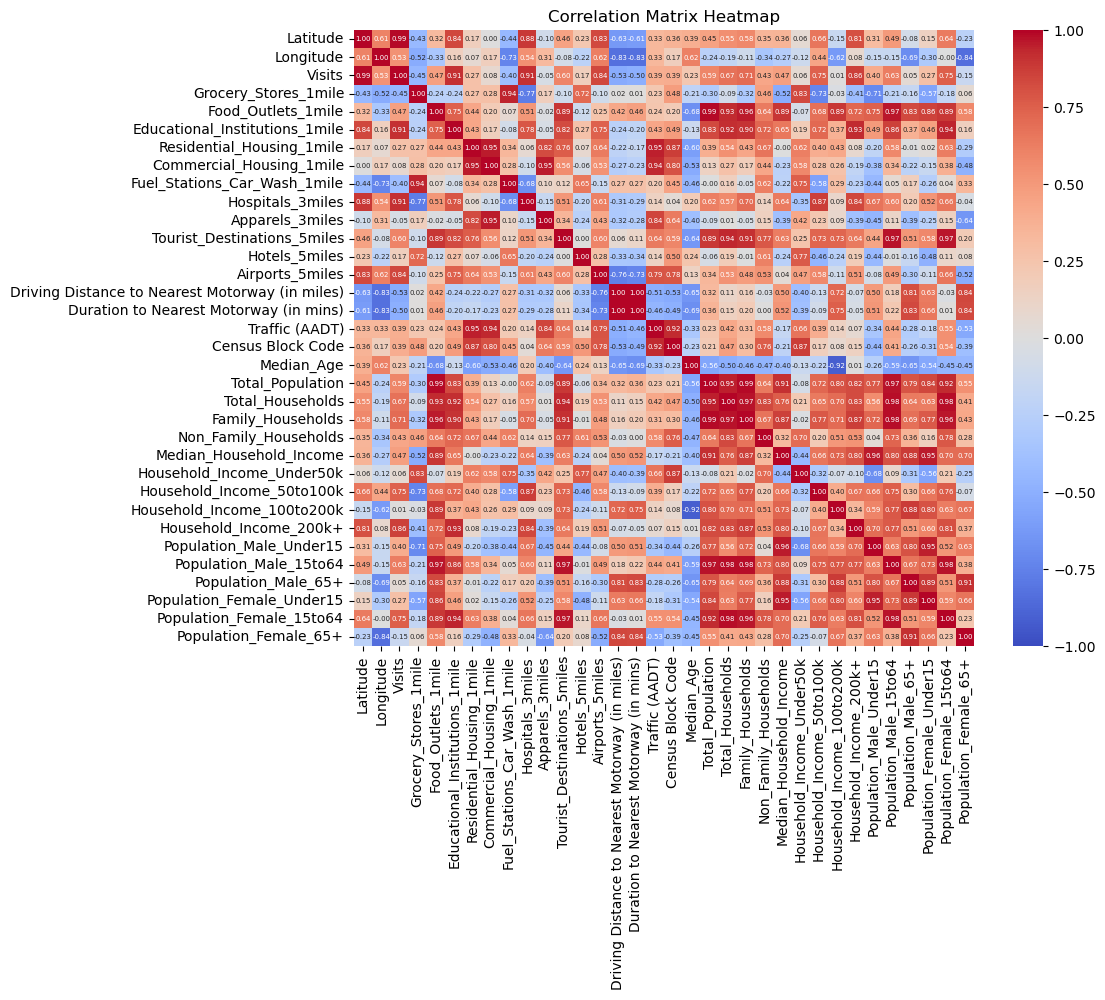

In [12]:
# Calculate the correlation matrix
corr = data.corr()

# Plot the heatmap with smaller annotation font size
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 5})
plt.title('Correlation Matrix Heatmap')
plt.show()

In [13]:
# Find pairs of fields with high correlation
high_corr = (corr.abs() > 0.85) & (corr.abs() < 1.0)
high_corr_pairs = high_corr.unstack().dropna()

# Filter out lower/upper triangular duplicates by sorting
unique_corr_pairs = high_corr_pairs.sort_values(ascending=False).drop_duplicates()

print("Pairs of fields with a correlation greater than 0.85:")
print(unique_corr_pairs[unique_corr_pairs > 0.85])

Pairs of fields with a correlation greater than 0.85:
Census Block Code  Household_Income_Under50k    True
dtype: bool


<hr style="border:2px solid #000"/>

# Multi-Collinearity Check

In [14]:
data.dtypes

Latitude                                           float64
Longitude                                          float64
Visits                                               int64
Grocery_Stores_1mile                                 int64
Food_Outlets_1mile                                   int64
Educational_Institutions_1mile                       int64
Residential_Housing_1mile                            int64
Commercial_Housing_1mile                             int64
Fuel_Stations_Car_Wash_1mile                         int64
Hospitals_3miles                                     int64
Apparels_3miles                                      int64
Tourist_Destinations_5miles                          int64
Hotels_5miles                                        int64
Airports_5miles                                      int64
Driving Distance to Nearest Motorway (in miles)    float64
Duration to Nearest Motorway (in mins)               int64
Traffic (AADT)                                     float

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

columns_vif = [
    "Grocery_Stores_1mile",
    "Food_Outlets_1mile",
    "Educational_Institutions_1mile",
    "Residential_Housing_1mile",
    "Commercial_Housing_1mile",
    "Fuel_Stations_Car_Wash_1mile",
    "Hospitals_3miles",
    "Apparels_3miles",
    "Tourist_Destinations_5miles",
    "Hotels_5miles",
    "Airports_5miles",
    "Total_Population",
    "Total_Households",
    "Family_Households",
    "Non_Family_Households",
    "Median_Household_Income",
    "Household_Income_Under50k",
    "Household_Income_50to100k",
    "Household_Income_100to200k",
    "Household_Income_200k+",
    "Median_Age",
    "Population_Male_Under15",
    "Population_Male_15to64",
    "Population_Male_65+",
    "Population_Female_Under15",
    "Population_Female_15to64",
    "Population_Female_65+",
    "Driving Distance to Nearest Motorway (in miles)",
    "Duration to Nearest Motorway (in mins)",
    "Traffic (AADT)"
]

# Assuming 'columns_vif' contains the list of scaled columns
vif_data = data[columns_vif].dropna()

# Calculating VIF for each feature
vif = pd.DataFrame({
    'Variable': vif_data.columns,
    'VIF': [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
})

# Sorting VIF values in descending order
vif_sorted = vif.sort_values('VIF', ascending=False)

# Displaying the VIF values
print(vif_sorted)

                                           Variable  VIF
0                              Grocery_Stores_1mile  inf
1                                Food_Outlets_1mile  inf
28           Duration to Nearest Motorway (in mins)  inf
27  Driving Distance to Nearest Motorway (in miles)  inf
26                            Population_Female_65+  inf
25                         Population_Female_15to64  inf
24                        Population_Female_Under15  inf
23                              Population_Male_65+  inf
22                           Population_Male_15to64  inf
21                          Population_Male_Under15  inf
20                                       Median_Age  inf
19                           Household_Income_200k+  inf
18                       Household_Income_100to200k  inf
17                        Household_Income_50to100k  inf
16                        Household_Income_Under50k  inf
15                          Median_Household_Income  inf
14                            N

/Users/harsh/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [16]:
columns_to_drop = [
    "Total_Population",
    "Total_Households",
    "Family_Households",
    "Non_Family_Households",
    "Median_Household_Income",
    "Duration to Nearest Motorway (in mins)",
    "Median_Age"
]

# Assuming 'data' is your DataFrame
data.drop(columns=columns_to_drop, inplace=True)

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

columns_vif = [
    "Grocery_Stores_1mile",
    "Food_Outlets_1mile",
    "Educational_Institutions_1mile",
    "Residential_Housing_1mile",
    "Commercial_Housing_1mile",
    "Fuel_Stations_Car_Wash_1mile",
    "Hospitals_3miles",
    "Apparels_3miles",
    "Tourist_Destinations_5miles",
    "Hotels_5miles",
    "Airports_5miles",
#     "Total_Population",
#     "Total_Households",
#     "Family_Households",
#     "Non_Family_Households",
#     "Median_Household_Income",
    "Household_Income_Under50k",
    "Household_Income_50to100k",
    "Household_Income_100to200k",
    "Household_Income_200k+",
#    "Median_Age",
    "Population_Male_Under15",
    "Population_Male_15to64",
    "Population_Male_65+",
    "Population_Female_Under15",
    "Population_Female_15to64",
    "Population_Female_65+",
    "Driving Distance to Nearest Motorway (in miles)",
#    "Duration to Nearest Motorway (in mins)",
    "Traffic (AADT)"
]

# Assuming 'columns_vif' contains the list of scaled columns
vif_data = data[columns_vif].dropna()

# Calculating VIF for each feature
vif = pd.DataFrame({
    'Variable': vif_data.columns,
    'VIF': [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
})

# Sorting VIF values in descending order
vif_sorted = vif.sort_values('VIF', ascending=False)

# Displaying the VIF values
print(vif_sorted)

                                           Variable  VIF
0                              Grocery_Stores_1mile  inf
12                        Household_Income_50to100k  inf
21  Driving Distance to Nearest Motorway (in miles)  inf
20                            Population_Female_65+  inf
19                         Population_Female_15to64  inf
18                        Population_Female_Under15  inf
17                              Population_Male_65+  inf
16                           Population_Male_15to64  inf
15                          Population_Male_Under15  inf
14                           Household_Income_200k+  inf
13                       Household_Income_100to200k  inf
11                        Household_Income_Under50k  inf
1                                Food_Outlets_1mile  inf
10                                  Airports_5miles  inf
9                                     Hotels_5miles  inf
8                       Tourist_Destinations_5miles  inf
7                              

/Users/harsh/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


<hr style="border:2px solid #000"/>

# Outlier Treatment

In [18]:
# List of columns to exclude from outlier removal
exclude_columns = ['City', 'State', 'County', 'Latitude', 'Longitude']

# Identify numeric columns for outlier treatment (excluding specified columns)
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns.difference(exclude_columns)

for col in numeric_cols:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

In [19]:
data.head()

,Latitude,Longitude,Visits,Grocery_Stores_1mile,Food_Outlets_1mile,Educational_Institutions_1mile,Residential_Housing_1mile,Commercial_Housing_1mile,Fuel_Stations_Car_Wash_1mile,Hospitals_3miles,Apparels_3miles,Tourist_Destinations_5miles,Hotels_5miles,Airports_5miles,Driving Distance to Nearest Motorway (in miles),Traffic (AADT),Census Block Code,City,State,County,Household_Income_Under50k,Household_Income_50to100k,Household_Income_100to200k,Household_Income_200k+,Population_Male_Under15,Population_Male_15to64,Population_Male_65+,Population_Female_Under15,Population_Female_15to64,Population_Female_65+
0,42.996667,-85.594391,54697,5,35,11,8,1,4,17,0,4,3,7,1.8,13114.0,3008,Grand Rapids,MI,Kent County,230,196,179,362,262,732,125,160,915,231
2,42.082033,-86.421991,30639,10,3,1,3,1,7,2,1,0,5,4,0.5,8477.0,3033,Benton Harbor,MI,Berrien County,345,61,10,0,36,289,53,31,258,177
3,42.254734,-84.359600,35253,4,5,0,0,1,2,10,3,0,0,4,0.4,5913.0,2009,Michigan Center,MI,Jackson County,135,150,10,0,152,300,48,93,232,112


In [20]:
data.shape[1]

30

In [21]:
# Print or save the updated DataFrame
data.to_csv('Data Files/preprocessed_df_sample.csv', index=False)